<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exam" data-toc-modified-id="Exam-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exam</a></span></li><li><span><a href="#IPython" data-toc-modified-id="IPython-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>IPython</a></span></li><li><span><a href="#Ipython-Answers" data-toc-modified-id="Ipython-Answers-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Ipython Answers</a></span></li><li><span><a href="#Numpy" data-toc-modified-id="Numpy-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Numpy</a></span></li><li><span><a href="#Pandas" data-toc-modified-id="Pandas-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Pandas</a></span></li><li><span><a href="#Extra-vraag" data-toc-modified-id="Extra-vraag-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Extra vraag</a></span></li></ul></div>

# Exam

* All answers should be given by a one liner. You never use a print statement. Your one-liner outputs the asked result.
* Never use loops.
    * You may use more than one line for Numpy 10 and Pandas 7.
* Example: What is the square root of 18 minus 4?
* Your answer: `np.sqrt(18-4)`  and nothing more. When you run it the answer will be written.

# IPython

1. Show using a magic shell command which files are in your working directory, and how large they are (in Bytes).
2. Use a magic shell command to remove the file `no_good.txt` (even if it does not exist).
3. You have written a great algorithm in Python and want to inspect the resources it uses. With which magic command(s) would you do that?
4. Suppose you have a variable `x`. How can you use a magic command to find out the datatype of the variable?

# Ipython Answers

1. `%ls -lh`
2. `%rm no_good.text`
3. `%time`, `%timeit`, `%prun`
4. `x?` and then inspect the first line of the output

In [27]:
import numpy as np
np.random.seed(0)   

x1 = np.random.randint(10, size=6)   
x2 = np.random.randint(10, size=(3, 4)) 

x1,x2

(array([5, 0, 3, 3, 7, 9]), array([[3, 5, 2, 4],
        [7, 6, 8, 8],
        [1, 6, 7, 7]]))

In [26]:
x2[range(min(x2.shape)),range(min(x2.shape))]


array([3, 7, 1])

# Numpy

1. Select using slicing the last 3 elements from x1.
2. Select using slicing the last 3 columns of the first two rows of x2.
3. Show the   shape and the size of x2
4. Reshape x2 into the  one dimensional array `array([3, 5, 2, 4, 7, 6, 8, 8, 1, 6, 7, 7])`
5. Change each element in x1 by its squared difference from the mean of x1.
6. The mean of the formula from the last question gives you the _variance_ of the set of data points in x1. 
Use this to compute the _standard deviation_ of x1 and show that this way of computing indeed gives you the standard deviation of x1 (by comparingthe outcome of your calculation to a direct computation of the standard deviation using a numpy function).
7. Why does adding x1 and x2 result in an error?
8. Apply a boolean mask to  x1  and reduce x1 to those integers which are divisible by 3.
9. Use fancy indexing to get the diagonal of x2, that is `array([3, 6, 7])`
10. Define `big_array = np.random.randint(10**3, size=10**6)`. Now compute the sum of the squares of `big_array` in two ways and time the difference. First using a comprehension, and second using numpy's universal functions.

In [13]:
#1
x1[-3:], x1[3:]
#2
x2[:2,-3:], x2[:2,1:]
#3
x2.shape,x2.size 
#4
x2.reshape((x2.size,))
#5
(x1 - x1.mean())**2
#6 
np.sqrt(((x1 - x1.mean())**2).mean()) == x1.std()
#7
print('De broadcasting regels verbieden het om x1 naar de shape van x2 te krijgen.')
#8
x1[x1 %3 ==0] 
#9
d=x2.shape[0]
dd=np.arange(d)
print(d,x2[dd,dd], x2[[0,1,2], [0,1,2]])
# 10
big_array = np.random.randint(10**3, size=10**7)  
%timeit sum([x**2 for x in big_array])
%timeit sum(big_array**2)

De broadcast regels verbieden het om x1 naar de shape van x2 te krijgen.
3 [3 6 7] [3 6 7]
2.82 s ± 145 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
777 ms ± 4.27 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [2]:
import pandas as pd
%matplotlib inline
import seaborn as sn
from collections import Counter


#iris= pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')
iris=pd.read_csv('iris.csv') 

text='''
Plot how many samples there are in the iris dataset of each species.
Create the dataframe X containing all the numerical data in  iris and the Series y which contains the species information.
Z- Normalize the data in each column of X by subtracting the mean of the column from each cell and divide by the standard deviation of each column. Show the head. Also show the standard deviation of each column of the Z-normalized data. Explain why you believe you did it correctly.
Sort iris first by 'sepal_length' and then by 'sepal_width'. We want that the sort is in reverse order (so the largest values are on top, but that ties in sepal_length are broken by sepal_width in standard order. (e.g. thus flower 118 is before flower 122).
What are the maximal sepal lengths for each species?
Restrict iris to those samples with a sepal_length larger than 5 and a sepal_width smaller than the square root of 5.'''



# Pandas

1. Plot how many samples there are in the iris dataset of each species. 
2. Create the dataframe `X` containing all the numerical data in  `iris`  and the Series `y` which contains the species information.
3. Z- Normalize the data in each column of `X` by subtracting the mean of the column from each cell and divide by the standard deviation of each column. Show the head. Also show the standard deviation of each column of the Z-normalized data. Explain why you believe you did it correctly.
4. Sort `iris` first by 'sepal_length' and then by  'sepal_width'. We want that the sort is in reverse order (so the largest values are on top, but that ties in sepal_length are broken by sepal_width in standard order. (e.g. thus flower 118 is before flower 122). 
5. What are the maximal sepal lengths for each species?
6. Restrict `iris` to those samples with a sepal_length larger than 5 and a sepal_width smaller than the square root of 5.
7. Tokenize the text in the variable `text` using `split()` and count each token using `Counter`. Create a Series from the dictionary with the token counts, and sort it so the most occuring tokens are at the top. Show the top 10 tokens. Call the Series `CS`.
8. Find all tokens in the text which occupy in total 24 characters (e.g. if the word `ida` occurs 5 times it occupies 15 characters). Just print out these tokens.
9. What percentage of all unique words in `text` occurs just once? And what percentage of all words in `text`?
10. Make a histogram (bar plot) which indicates for each number _i_ of occurances how many tokens in `text` occur _i_ many times. (So if there are 8 words which occur each 4 times, we have an 8-high  bar at x-value 4).

2.2360679775


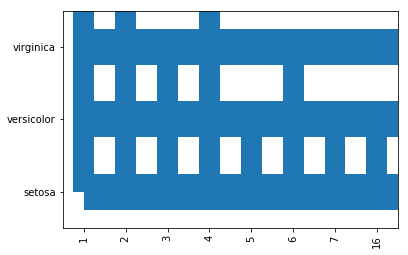

In [15]:
# Pandas answers

#1
iris.species.value_counts().plot(kind='barh');
#2
X,y= iris.drop('species', axis=1), iris.species
#3
((X-X.mean())/X.std()).head(),'', ((X-X.mean())/X.std()).std(),'The stds should all be equal to 1'
#4
iris.sort_values(['sepal_length', 'sepal_width'], ascending=[False,True])
#5
iris.groupby('species')['sepal_length'].max()
#6
a=np.sqrt(5)
print(a)
iris.query('sepal_length >5 and sepal_width < @a')
#7
C= Counter(text.split())
CS= pd.Series(C).sort_values(ascending=False)
CS.head(10)
#8
CS[CS*CS.index.str.len() ==24].index
#9
CS[CS==1].sum()/ CS.count(),  (CS==1).mean(),  CS[CS==1].sum()/ CS.sum(), (CS==1).sum()/CS.sum()
#10
pd.Series(Counter(CS.values)).plot(kind='bar'); CS.value_counts().sort_index().plot(kind='bar');

In [3]:
C= Counter(text.split())
CS= pd.Series(C).sort_values(ascending=False)
CS[CS==1].sum()/ CS.count(),  (CS==1).mean(),  CS[CS==1].sum()/ CS.sum(), (CS==1).sum()/CS.sum()


(0.77777777777777779,
 0.77777777777777779,
 0.48427672955974843,
 0.48427672955974843)

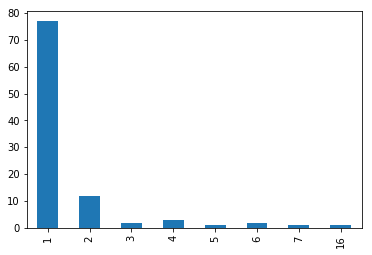

In [13]:
pd.Series(Counter(CS.values)).plot(kind='bar')
CS.value_counts().sort_index().plot(kind='bar')

# Extra vraag

op het dataframe gebaseerd op <https://en.wikipedia.org/wiki/List_of_members_of_the_17th_Bundestag>, geef een oneliner die het land met de meeste bondsdagleden print samen met het aantal leden van dat land.

In [18]:

bd= pd.read_html('https://en.wikipedia.org/wiki/List_of_members_of_the_17th_Bundestag')[1]


In [19]:
bd.groupby(0)[1].count().sort_values().tail(1)

0
Nordrhein-Westfalen    136
Name: 1, dtype: int64

In [20]:
winnaar=bd.groupby(0)[1].count()
winnaar.argmax(), winnaar.max()

('Nordrhein-Westfalen', 136)

In [36]:
# Welke partij heeft het grootste aantal leden uit 1 deelstaat?
bd.groupby(0)[2].value_counts().sort_values().tail(1)

0                    2  
Nordrhein-Westfalen  CDU    47
Name: 2, dtype: int64